# Capstone Project Module 2 - Supermarket Key Customer Analysis
## Oleh: Suluh Bagaspati

## Latar Belakang
Dalam industri ritel, memahami siapa pelanggan utama dan bagaimana kebiasaan belanja mereka merupakan kunci dalam menyusun strategi pemasaran yang efektif. Supermarket sering menghadapi tantangan dalam mengidentifikasi segmen pelanggan yang paling bernilai dan menentukan pendekatan terbaik untuk meningkatkan loyalitas dan nilai pembelian mereka.

## Pernyataan Masalah
Sebagai seorang Data Analyst, tugas utama saya adalah membantu perusahaan memahami data pelanggan untuk mendukung pengambilan keputusan yang berbasis bukti. Oleh karena itu, melalui analisis data demografi dan perilaku belanja, saya melakukan eksplorasi data untuk menjawab dua pertanyaan utama:
1. Siapa yang dapat dikategorikan sebagai pelanggan utama berdasarkan demografi dan total pengeluaran?
2. Bagaimana kebiasaan belanja dari pelanggan utama tersebut?<br>

Dengan hasil analisis ini, perusahaan diharapkan dapat merancang strategi yang lebih personal dan tepat sasaran, baik dalam kampanye promosi, penawaran produk, maupun pengelolaan saluran penjualan.

## Data Understanding dan Cleaning
### Supermarket Customers Data Dictionary
#### People
- ID: ID unik untuk setiap pelanggan
- Year_Birth: Tahun kelahiran pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pernikahan pelanggan
- Income: Pendapatan rumah tangga tahunan pelanggan
- Kidhome: Jumlah anak kecil di rumah (balita/anak-anak)
- Teenhome: Jumlah remaja di rumah
- Dt_Customer: Tanggal pelanggan mulai menjadi anggota/bergabung dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan pernah mengeluh dalam 2 tahun terakhir, 0 jika tidak
#### Products
- MntWines: Jumlah uang yang dihabiskan untuk membeli wine dalam 2 tahun terakhir
- MntFruits: Jumlah uang yang dihabiskan untuk membeli buah dalam 2 tahun terakhir
- MntMeatProducts: Jumlah uang yang dihabiskan untuk membeli daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah uang yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah uang yang dihabiskan untuk membeli makanan manis dalam 2 tahun terakhir
- MntGoldProds: Jumlah uang yang dihabiskan untuk produk emas dalam 2 tahun terakhir
#### Promotion
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima penawaran pada kampanye ke-1, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima penawaran pada kampanye ke-2, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima penawaran pada kampanye ke-3, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima penawaran pada kampanye ke-4, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima penawaran pada kampanye ke-5, 0 jika tidak
- Response: 1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak
#### Place
- NumWebPurchases: Jumlah pembelian melalui website perusahaan
- NumCatalogPurchases: Jumlah pembelian melalui katalog
- NumStorePurchases: Jumlah pembelian langsung di toko secara langsung
- NumWebVisitsMonth: : Jumlah kunjungan ke website perusahaan dalam 1 bulan terakhir

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, mannwhitneyu, kruskal
import scikit_posthocs as sp

### Load Dataset

In [2]:
df = pd.read_csv('Supermarket Customers.csv',sep='\t')

pd.set_option('display.max_columns', None)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


In [4]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

Mengubah menjadi datatime untuk menghitung umur customer

In [5]:
df['TotalSpending'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)

Menambahkan kolom total spending

In [6]:
data_year = df['Dt_Customer'].dt.year.max()

df['Age'] = data_year - df['Year_Birth']

Menambahkan kolom umur

In [7]:
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

- Kolom ID tidak diperlukan karena hanya sebagai pembeda dari setiap pelanggan.
- Kolom Z_CostContact dan Z_Revenue nilainya sama semua sehingga tidak diperlukan.

In [8]:
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 182


In [9]:
df = df.drop_duplicates().reset_index(drop=True)

- Terdapat 182 data duplikat setelah menghapus kolom ID.
- Satu pelanggan terdaftar lebih dari sekali tanpa perbedaan data.
- Oleh karena itu duplikat bisa dihapus.

In [10]:
def cekOutliers(col):
    Q1 = df.describe()[col]['25%']
    Q3 = df.describe()[col]['75%']
    IQR = Q3 - Q1
    
    batas_atas = Q3 + (1.5 * IQR)
    batas_bawah = Q1 - (1.5 * IQR)
    
    df_outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]
    
    return df_outliers

In [11]:
cekOutliers('Income')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Age
163,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,1608,41
604,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,107,38
640,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6,39
669,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,1717,32
1244,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,59,43
1548,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,1730,37
1964,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,8,65
2053,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,62,37


- Terdapat nilai yang tidak wajar pada kolom Income yaitu 666666.0.
- Outlier lain nilainya masih dianggap wajar apabila melihat distribusi Income.

In [12]:
cekOutliers('Year_Birth')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Age
190,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,65,114
237,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,22,121
335,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,1853,115


- Pada kolom Year_Birth terdapat 3 pelaggan dengan tahun kelahiran tidak wajar mengingat dari Dt_Customer pelanggan terdaftar pada tahun 2012-2014.

In [13]:
status_counts = df['Marital_Status'].value_counts().reset_index()
status_counts.columns = ['Marital_Status', 'Count']
status_counts

,Marital_Status,Count
0,Married,795
1,Together,521
2,Single,448
3,Divorced,216
4,Widow,71
5,Alone,3
6,Absurd,2
7,YOLO,2


In [14]:
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single'})

- Terdapat kategori bermakna sama yaitu Alone dan Single sehingga bisa dikelompokkan ke satu kategori.
- Absurd dan YOLO tidak mencerminkan status pernikahan sehingga tidak wajar.
- Jumlah baris yang tidak wajar nilainya pada kolom Marital_Status ada 4.

In [15]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
TotalSpending           0
Age                     0
dtype: int64

In [16]:
df = df[
    df['Income'].notna() &
    (df['Income'] < 200000) &
    (df['Year_Birth'] >= 1920)
]
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

- Total nilai tidak wajar dan nilai kosong yaitu 32 baris.
- 32 dari 2058 baris yaitu sekitar 1.55% data artinya jumlahnya tidak banyak.
- Oleh karena itu penghapusan baris tidak akan merusak data secara signifikan.

In [17]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,57
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,49
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,33


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 0 to 2057
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2026 non-null   int64         
 1   Education            2026 non-null   object        
 2   Marital_Status       2026 non-null   object        
 3   Income               2026 non-null   float64       
 4   Kidhome              2026 non-null   int64         
 5   Teenhome             2026 non-null   int64         
 6   Dt_Customer          2026 non-null   datetime64[ns]
 7   Recency              2026 non-null   int64         
 8   MntWines             2026 non-null   int64         
 9   MntFruits            2026 non-null   int64         
 10  MntMeatProducts      2026 non-null   int64         
 11  MntFishProducts      2026 non-null   int64         
 12  MntSweetProducts     2026 non-null   int64         
 13  MntGoldProds         2026 non-null   i

In [19]:
df_numeric = df.select_dtypes(include=['number'])
df_object = df.select_dtypes(include=['object'])
df_datetime = df.select_dtypes(include=['datetime64[ns]'])

display(df_numeric.describe(), df_object.describe(), df_datetime.describe())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Age
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,1968.894373,52027.212734,0.443731,0.508885,48.892892,305.328727,26.229023,167.775420,37.328233,27.181145,43.610069,2.336624,4.100197,2.668806,5.787266,5.326259,0.074531,0.076505,0.071570,0.065153,0.012833,0.009378,0.153011,607.452616,45.105627
std,11.661002,21601.926769,0.536143,0.546296,28.970140,337.627172,39.704935,226.836047,54.602567,41.538490,51.411955,1.934536,2.759375,2.936259,3.242108,2.436892,0.262698,0.265871,0.257838,0.246857,0.112582,0.096409,0.360087,603.419949,11.661002
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,18.000000
25%,1959.000000,35422.250000,0.000000,0.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,37.000000
50%,1970.000000,51523.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.500000,44.000000
75%,1977.000000,68445.750000,1.000000,1.000000,74.000000,506.500000,33.000000,230.000000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1047.750000,55.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,74.000000


,Education,Marital_Status
count,2026,2026
unique,5,5
top,Graduation,Married
freq,1017,788


,Dt_Customer
count,2026
mean,2013-07-11 16:19:25.646594304
min,2012-07-30 00:00:00
25%,2013-01-17 00:00:00
50%,2013-07-12 12:00:00
75%,2014-01-02 00:00:00
max,2014-06-29 00:00:00


In [20]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

unique_values = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'], data = listItem)

pd.set_option('max_colwidth', None)
unique_values

,Column Name,Number of Unique,Unique Sample
0,Year_Birth,56,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1983, 1945, 1991, 1962, 1953, 1956, 1992, 1961, 1986, 1990, 1947, 1993, 1994, 1941, 1944, 1995, 1940]"
1,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
2,Marital_Status,5,"[Single, Together, Married, Divorced, Widow]"
3,Income,1969,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, 68126.0, ...]"
4,Kidhome,3,"[0, 1, 2]"
5,Teenhome,3,"[0, 1, 2]"
6,Dt_Customer,662,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-02-20 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06-20 00:00:00, 2013-07-23 00:00:00, 2014-03-30 00:00:00, 2013-04-20 00:00:00, 2013-05-17 00:00:00, 2014-05-08 00:00:00, 2013-12-10 00:00:00, 2013-09-24 00:00:00, 2013-02-02 00:00:00, 2012-12-07 00:00:00, 2013-11-02 00:00:00, 2012-11-10 00:00:00, 2014-06-25 00:00:00, 2012-12-12 00:00:00, 2013-09-10 00:00:00, 2014-01-24 00:00:00, 2013-02-19 00:00:00, 2013-07-11 00:00:00, 2013-11-14 00:00:00, ...]"
7,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 40, 9, 87, 5, 95, 48, 70, 79, 84, 44, 43, 35, 15, 17, 46, 27, 25, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 80, 45, 14, 52, 93, 50, 60, 11, 66, 97, 62

## Exploratory Data Analysis

### Visualisasi Distribusi Data Numerik

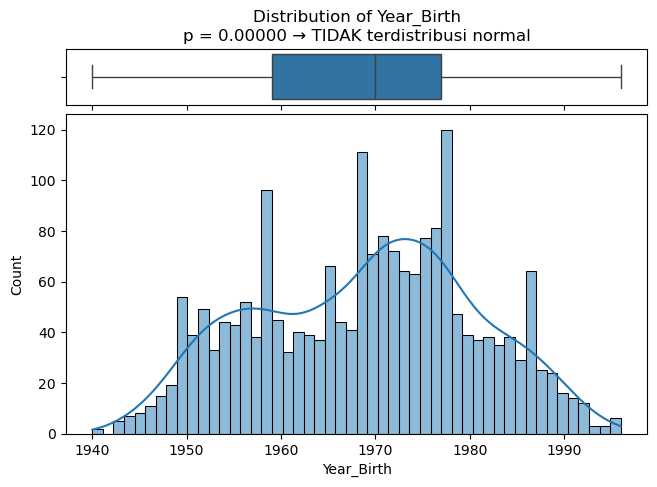

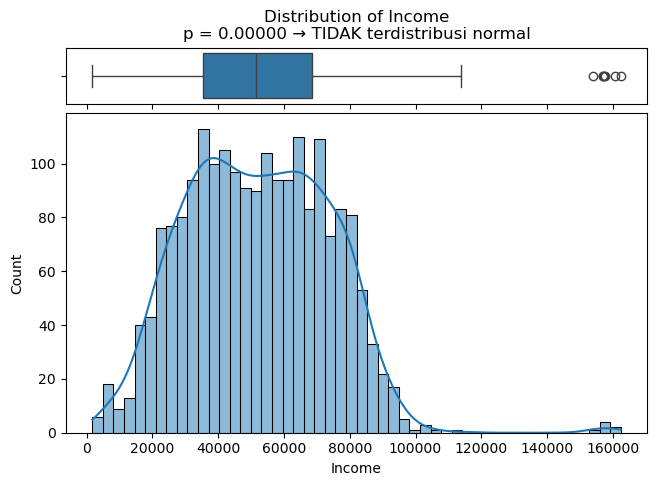

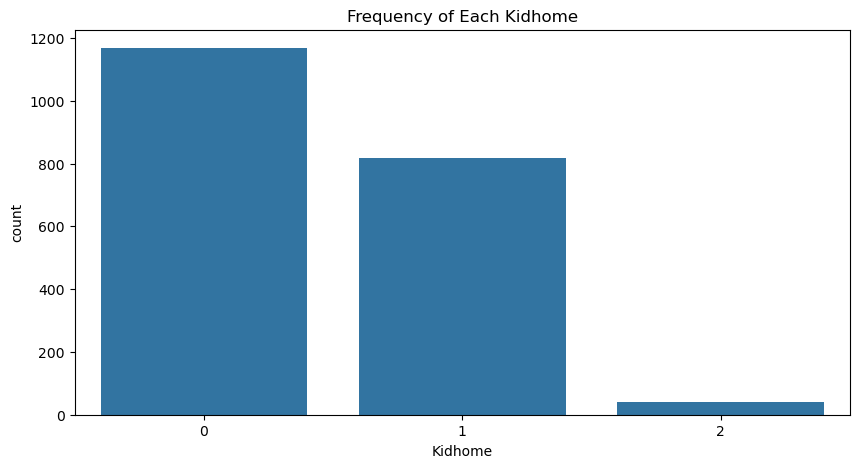

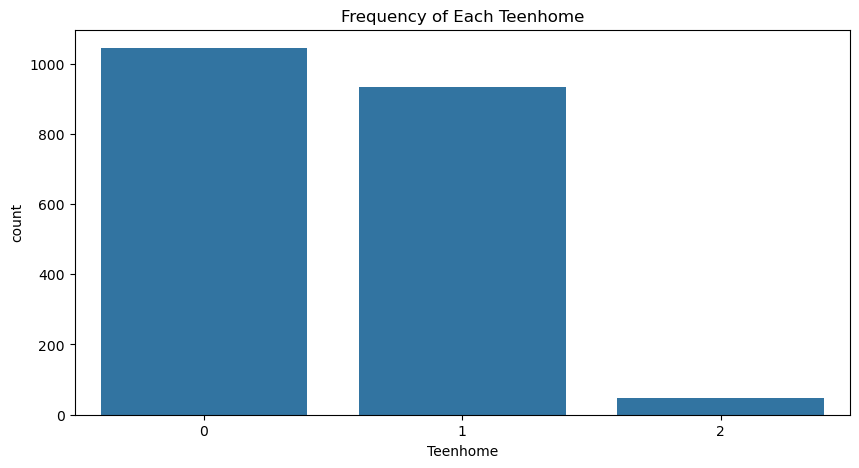

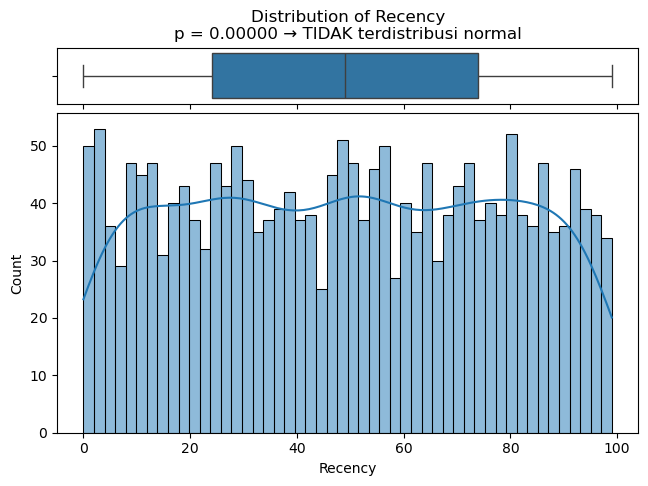

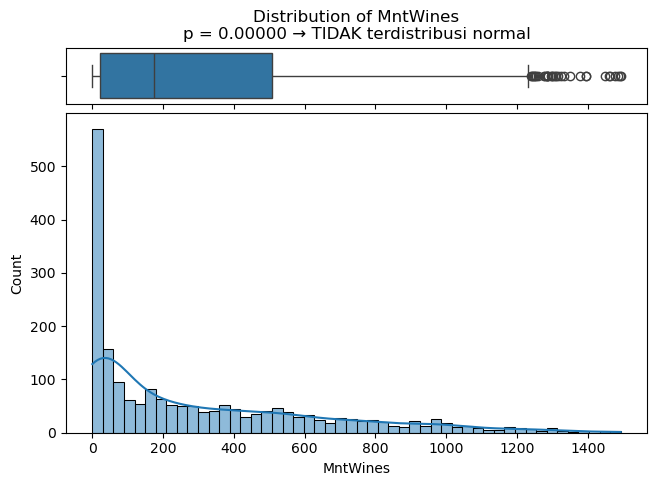

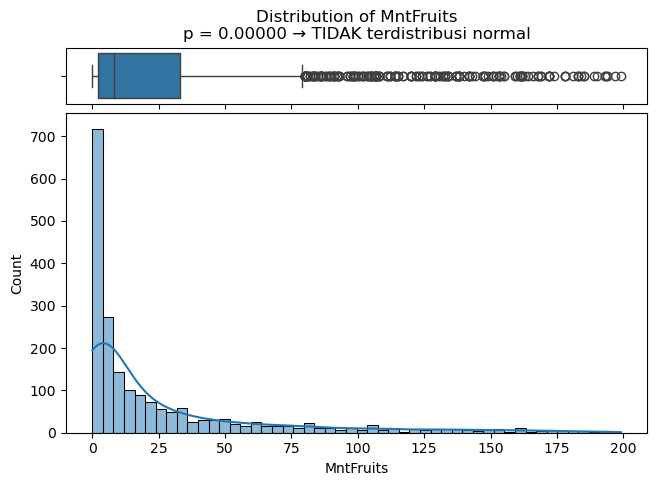

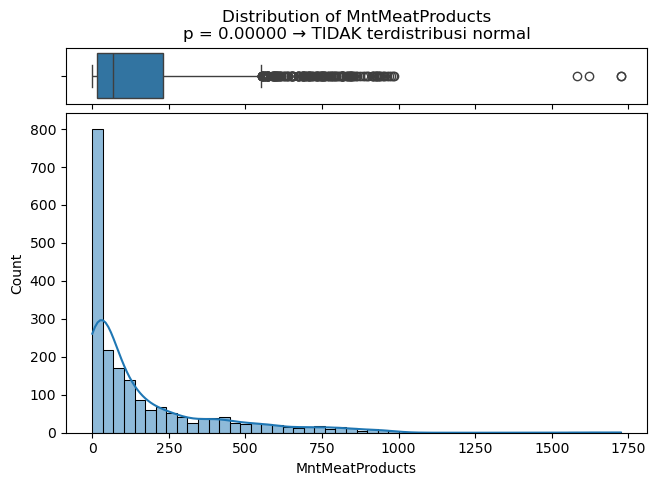

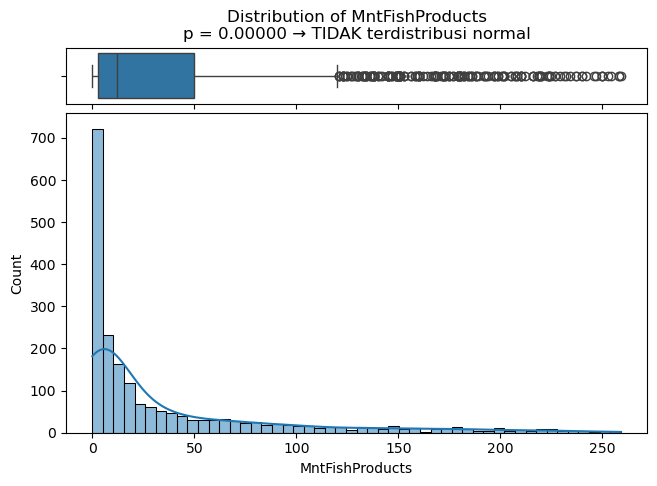

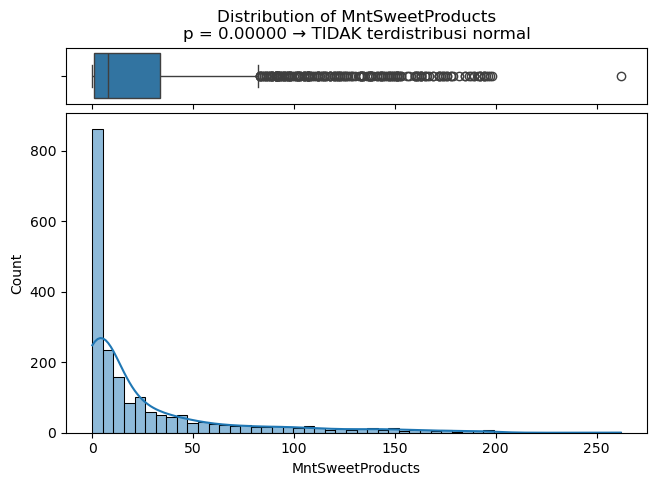

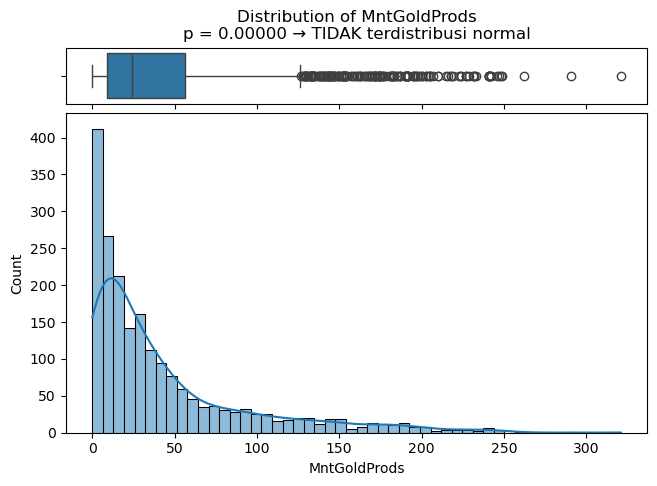

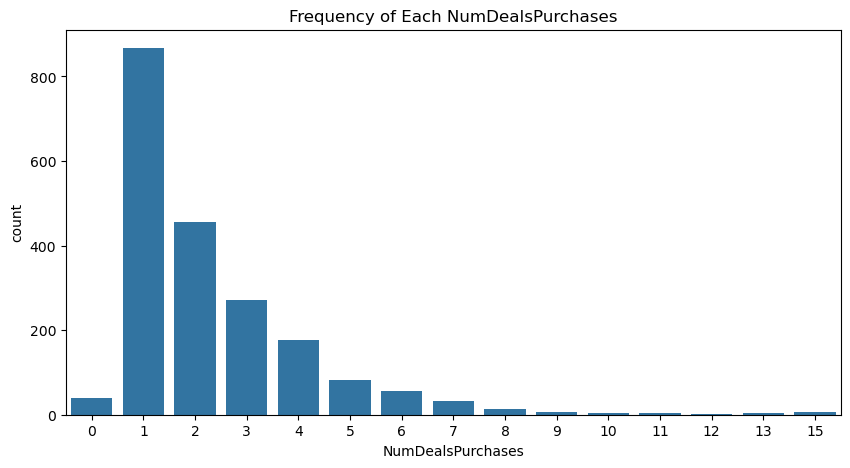

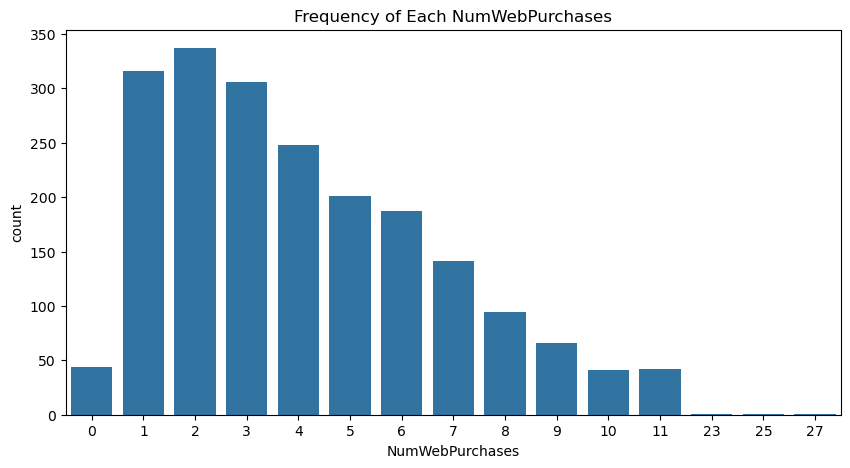

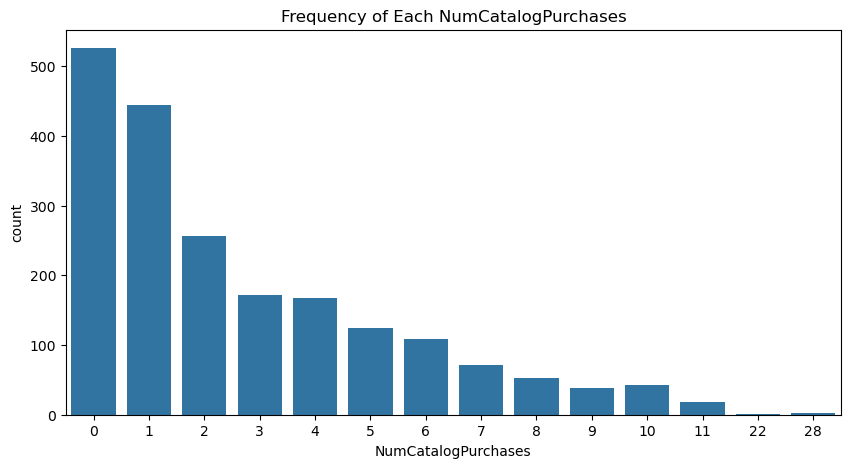

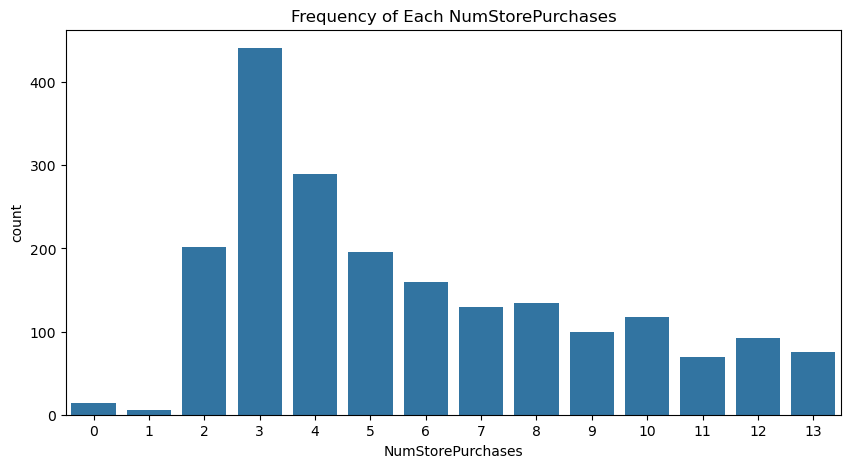

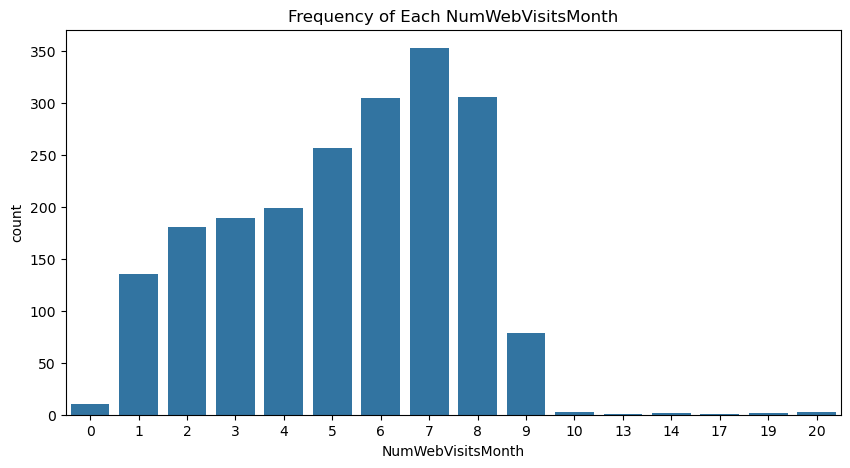

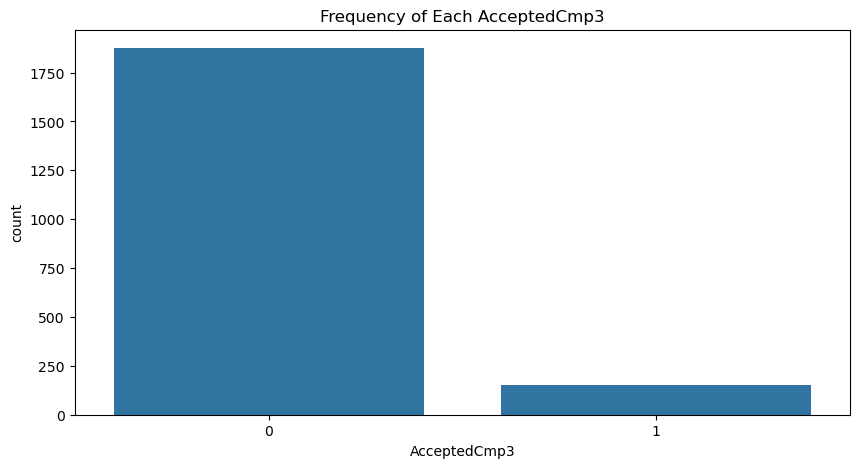

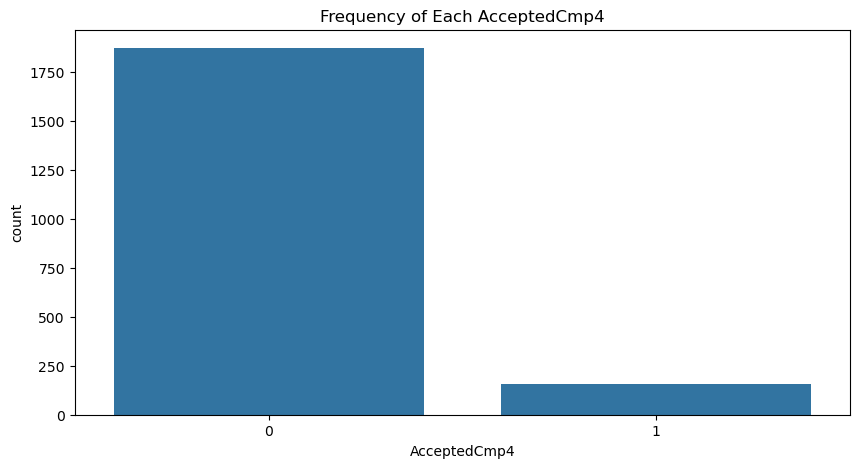

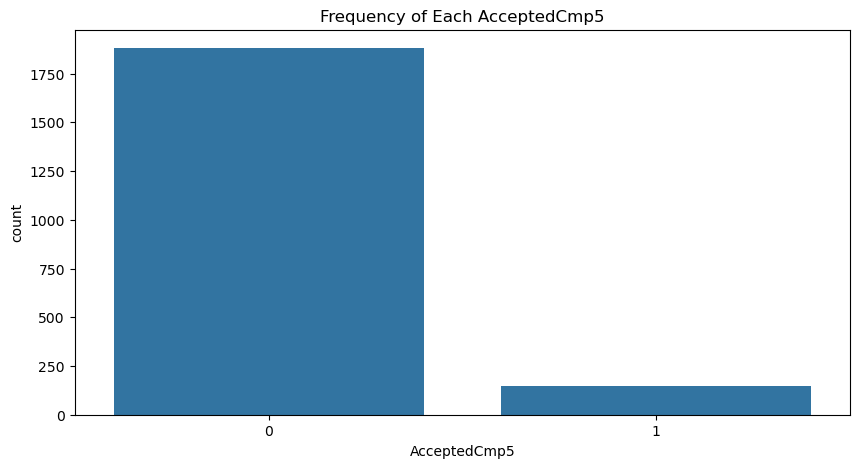

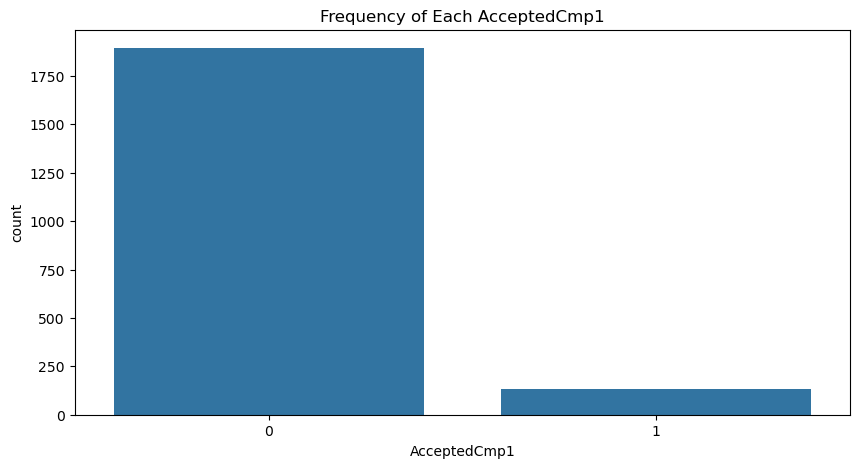

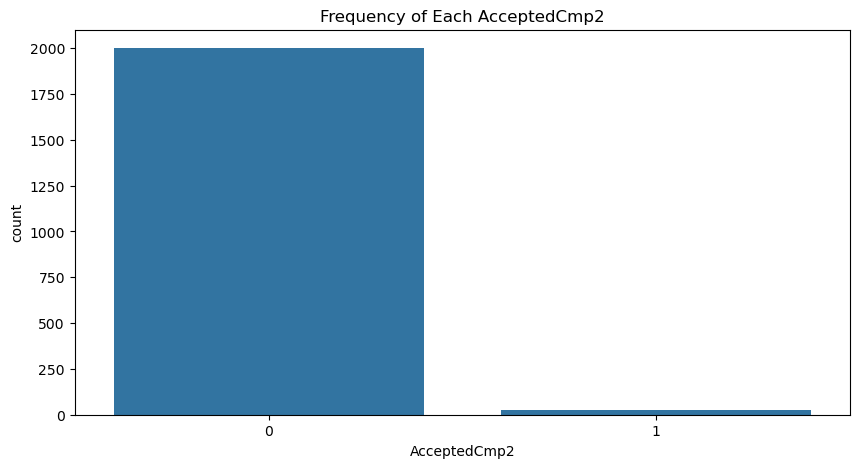

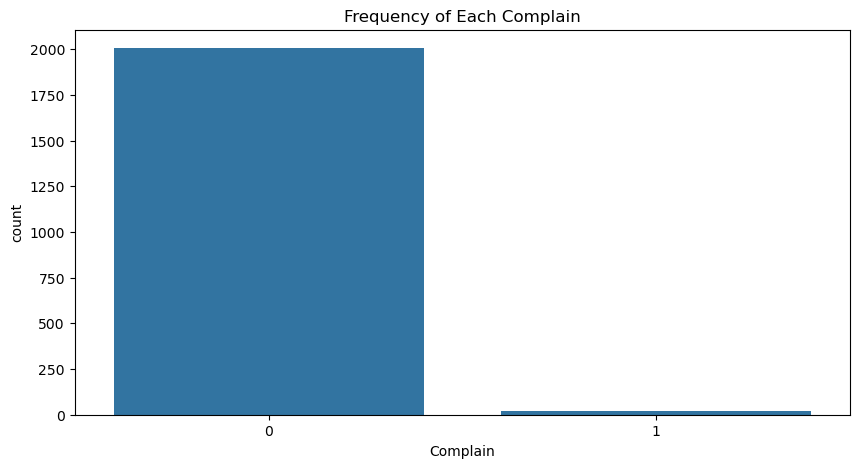

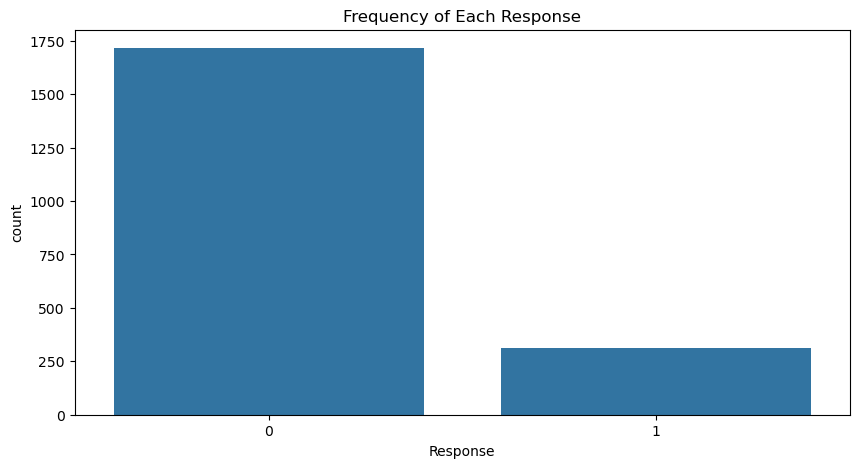

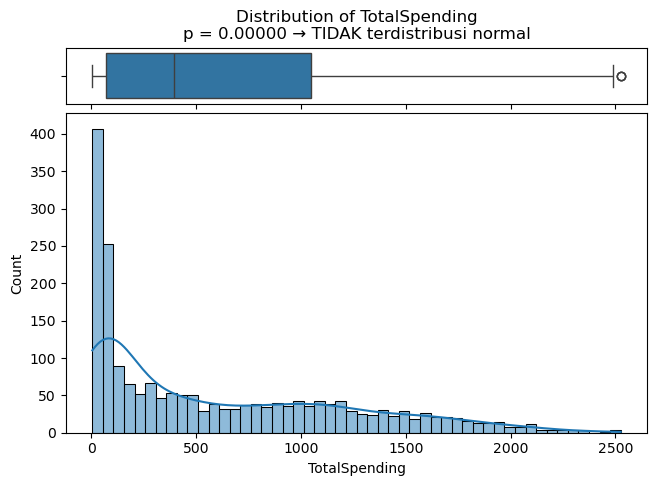

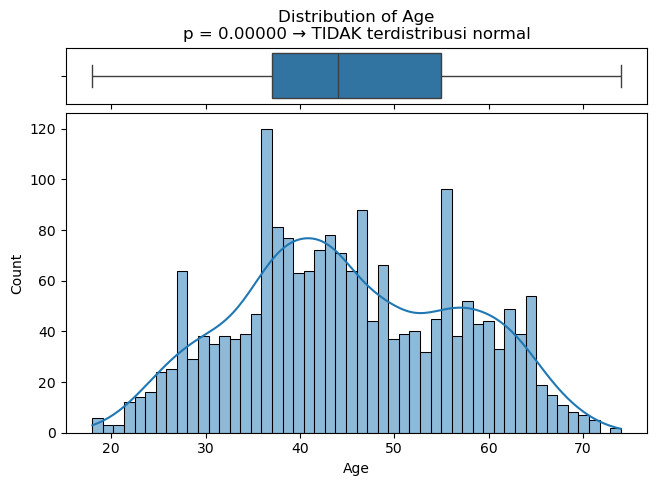

In [21]:
for col in df_numeric.columns:
    data = df[col]

    if df[col].nunique() >= 20:
        stat, p = normaltest(data)
        if p > 0.05:
            distribusi = f"p = {p:.5f} → Distribusi NORMAL"
        else:
            distribusi = f"p = {p:.5f} → TIDAK terdistribusi normal"
        
        fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                        gridspec_kw={"height_ratios": (.15, .85),
                                                    "hspace": 0.05})
        
        ax1.set_title(f"Distribution of {col}\n{distribusi}")
        sns.boxplot(x = df[col], ax = ax1)
        ax1.set(xlabel = "")
        sns.histplot(data = df[col], ax = ax2, stat = "count", kde=True, bins=50)
    else:
        plt.figure(figsize = (10, 5))
        plt.title(f'Frequency of Each {col}')
        sns.countplot(data=df, x=df[col])
    plt.show()

- Visualisasi data numerik dilakukan dengan histogram dan barplot/countplot.
- Kolom dengan data unik < 20 ditampilkan dengan barplot.
- Kolom dengan data unik cukup banyak ditampilkan dengan histogram.
- Tidak ada kolom dengan data yang terdistribusi normal.
- Terdapat data categorical dengan nilai numerik yaitu kolom yang memiliki nilat unik <= 5.

### Visualisasi Korelasi Data Numerik

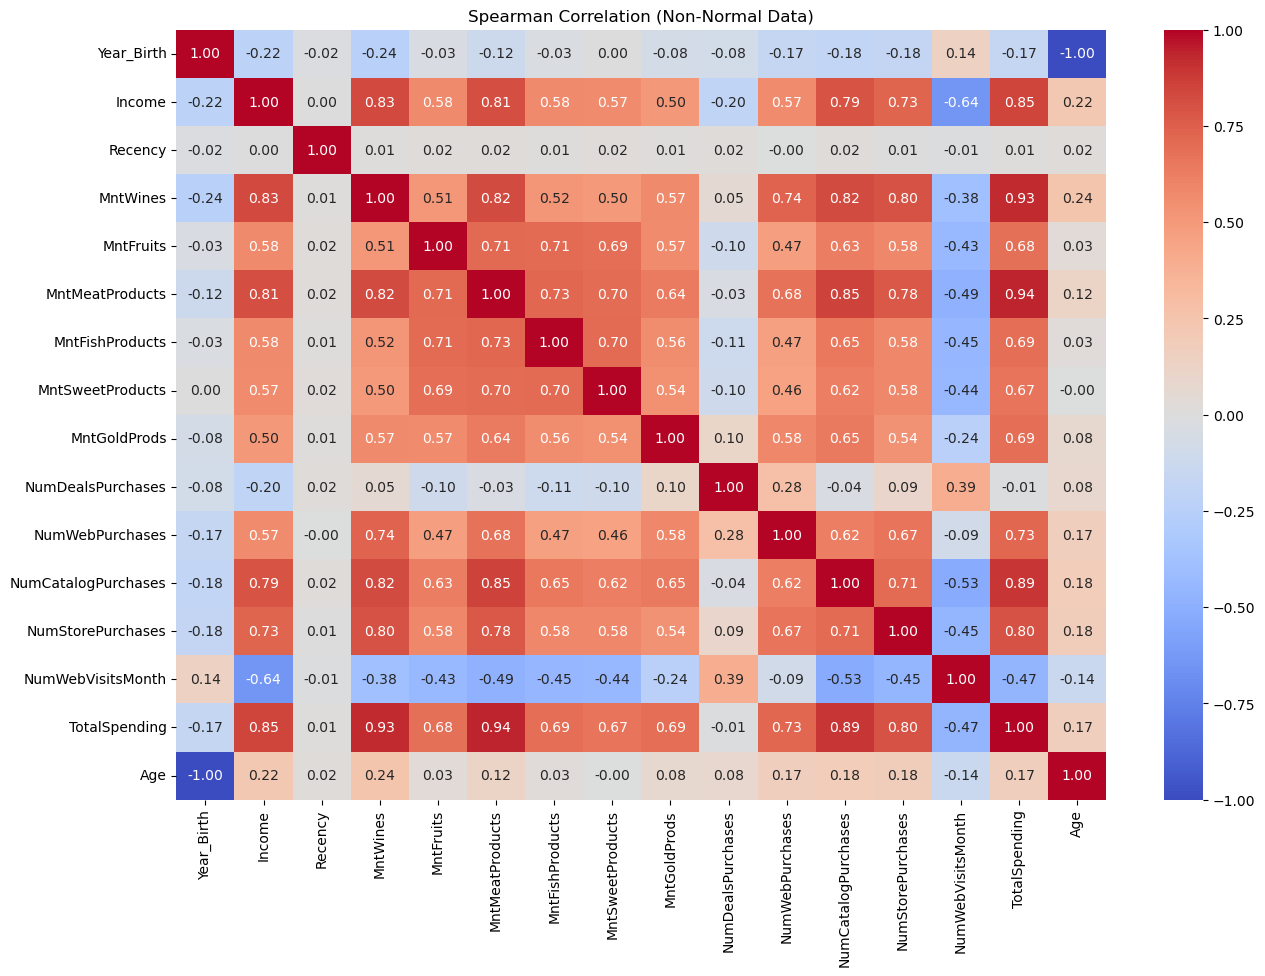

In [22]:
categorical_numeric = [col for col in df_numeric.columns if df_numeric[col].nunique() <= 5]

df_filtered = df_numeric.drop(columns=categorical_numeric)

corr_spearman = df_filtered.corr(method='spearman')

plt.figure(figsize=(15, 10))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation (Non-Normal Data)")
plt.show()

- Data numerik yang ada yaitu antara diskrit atau kontinyu tetapi tidak terdistribusi normal sehingga digunakan Spearman untuk korelasinya.
- Kolom-kolom yang menjelaskan pelanggan menunjukkan korelasi kuat dan positif terhadap TotalSpending pada kolom Income.
- Semakin tinggi Income maka semakin besar spending.
- Kolom-kolom yang menjelaskan produk memiliki korelasi kuat dan positif terhadap TotalSpending pada pembelian wine dan daging.
- Jumlah uang yang dihabiskan untuk wine dan daging lebih berpengaruh ke total spending dibanding dengan produk lainnya.
- Kolom-kolom yang menjelaskan promosi semuanya memiliki korelasi kuat dan positif terhadap TotalSpending pada pembelian melalui web, catalog, dan store.
- Kolom promosi yang numerik hanya pada NumDealsPurchases dan korelasinya lemah terhadap TotalSpending.

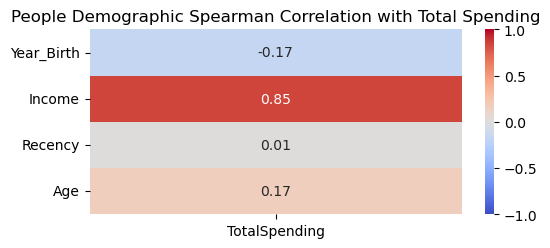

In [23]:
people_col = ['Year_Birth', 'Income', 'Recency', 'Age', 'TotalSpending']
corr_spearman = df[people_col].corr(method='spearman')

corr= corr_spearman[['TotalSpending']].drop('TotalSpending')

plt.figure(figsize=(6, len(corr) * 0.6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("People Demographic Spearman Correlation with Total Spending")
plt.show()

- Heat map yang ini menjadi yang terpenting  karena menunjukkan korelasi kolom-kolom yang menggambarkan demografi pelanggan dengan jumlah pengeluarannya.
- Dari semua kolom hanya Income atau penghasilan yang berkorelasi kuat.
- Korelasinya positif artinya semakin tinggi Income maka semakin besar spending.

### Visualisasi Distribusi Data Categorical

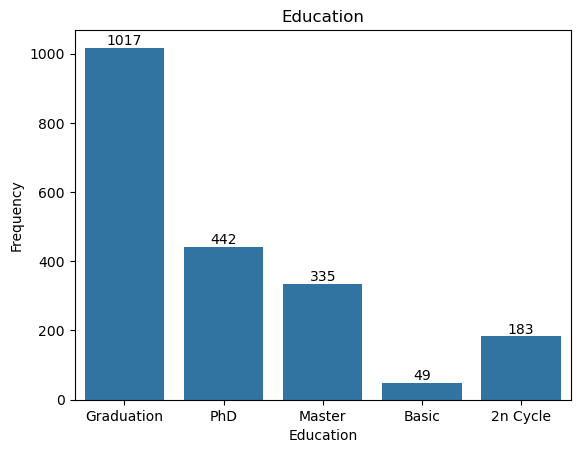

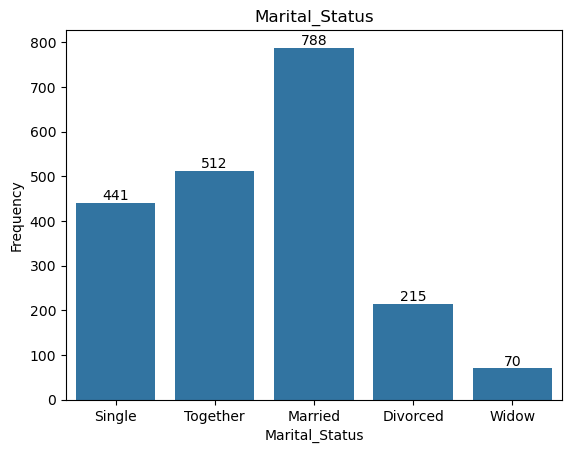

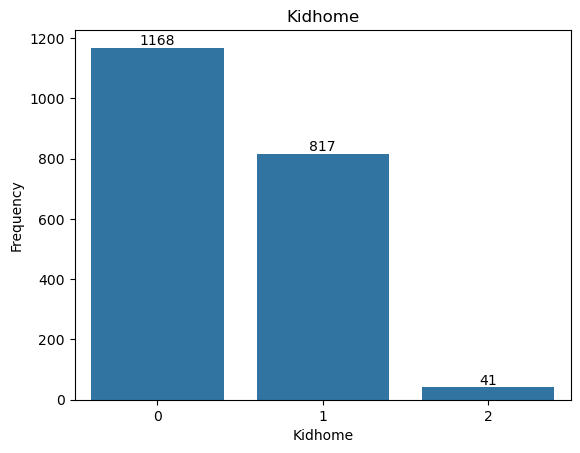

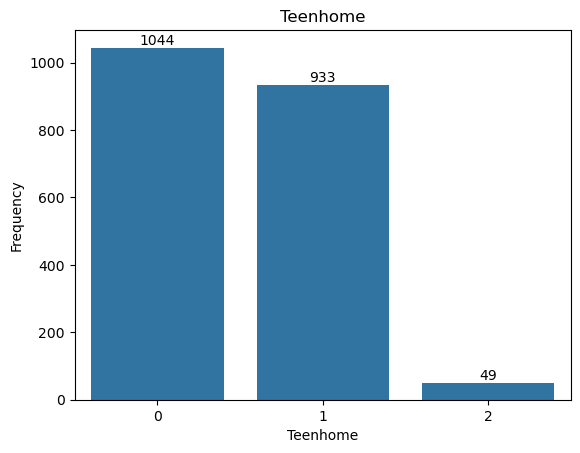

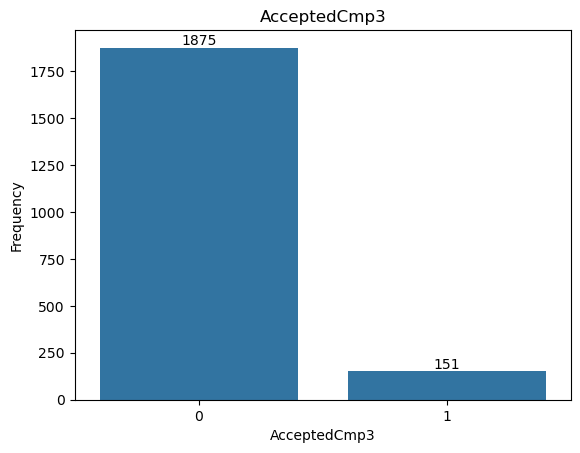

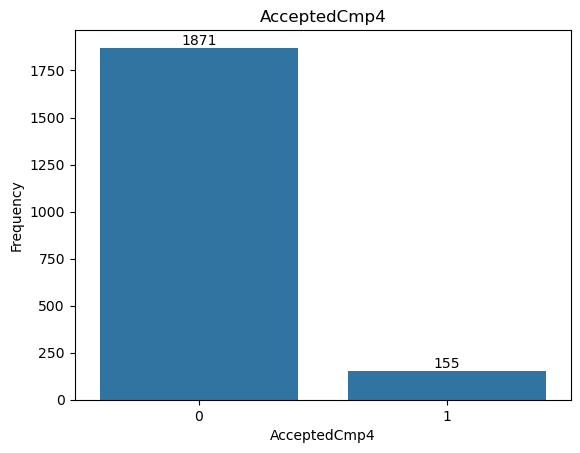

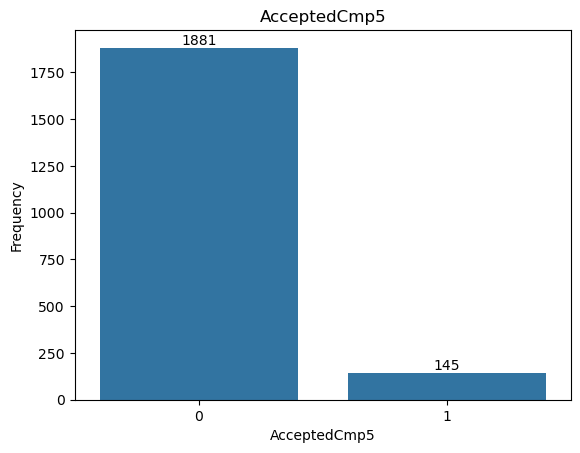

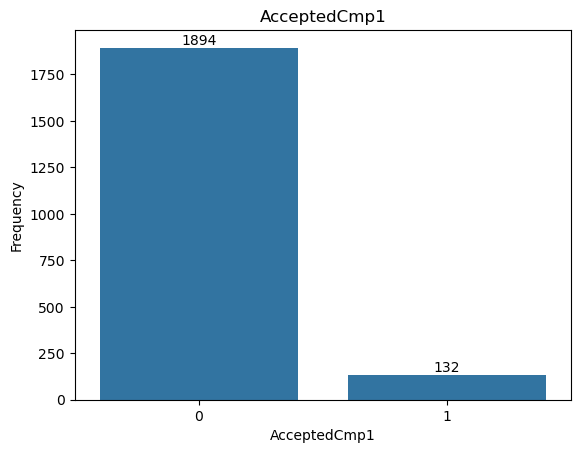

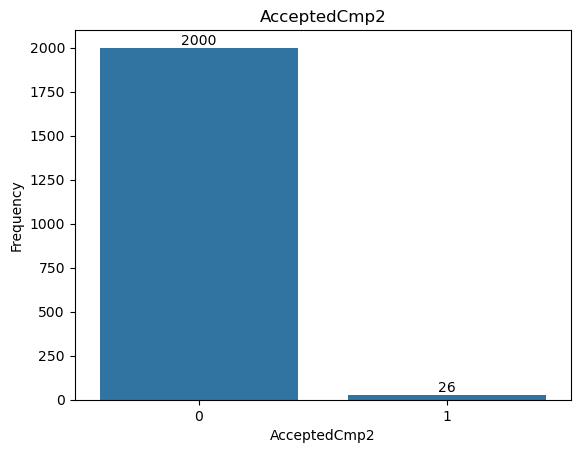

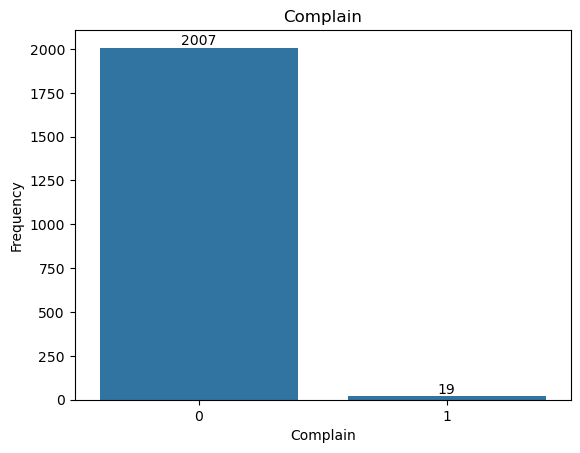

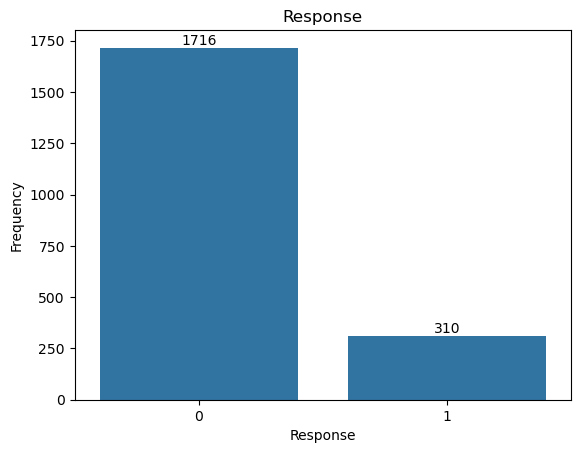

In [24]:
for col in list(df_object.columns) + categorical_numeric:
    ax = sns.countplot(data=df, x=df[col])

    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f'{count}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()

- Kolom categorical nantinya akan dicek apakah terdapat perbedaan TotalSpending yang signifikan antar kategori.
- Hal ini untuk mengetahui pelanggan mana yang merupakan top spending.
- Untuk itu kolom yang diuji hanya kolom-kolom yang menjelaskan pelanggan bukan kolom tentang promosi.

### Uji Statistik Data Categorical

#### Kolom dengan Dua Kategori
- Digunakan uji Mann Whitney untuk uji statistik.
- Apabila nilai p < 0.05 maka terdapat perbedaan signifikan

In [25]:
binary_columns = ['Complain']

for col in binary_columns:
    group_0 = df[df[col] == 0]['TotalSpending']
    group_1 = df[df[col] == 1]['TotalSpending']
    
    stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
    print(f'{col}: p-value =', p)

    if p < 0.05:
        ax = sns.boxplot(x=col, y='TotalSpending', data=df)
        plt.title(f"p-value = {p:.5f}\n\n\n")
        
        medians = df.groupby(col)['TotalSpending'].median()
        
        labels = [f"Median:\n{int(m)}" for m in medians]
        for i, label in enumerate(labels):
            ax.annotate(label, xy=(i, 1.05), xycoords=('data', 'axes fraction'), ha='center')
        
        plt.ylabel("Total Spending")
        plt.tight_layout()
        plt.show()

Complain: p-value = 0.12539201300007616


- p-value lebih dari 0.05
- Distribusi jumlah uang yang dihabiskan ketika terdapat protes dari pelanggan di 2 tahun terakhir tidak signifikan perbedaanya apabila dibandingkan dengan distribusi pelanggan tanpa protes.

#### Kolom dengan Kategori Lebih dari Dua
- Digunakan uji Kruskal Wallis untuk uji statistik.
- Apabila nilai p < 0.05 maka terdapat perbedaan signifikan pada salah satu kategori.
- Dilakukan uji Posthoc Dunn untuk mengetahui kategori mana yang berbeda.

Education: p-value = 0.00000


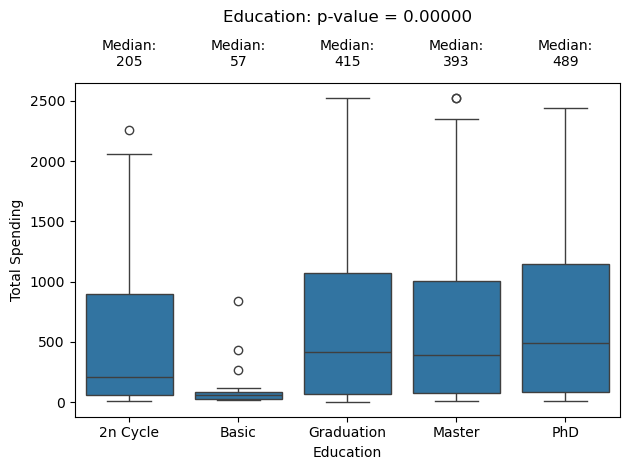

Marital_Status: p-value = 0.19370
Kidhome: p-value = 0.00000


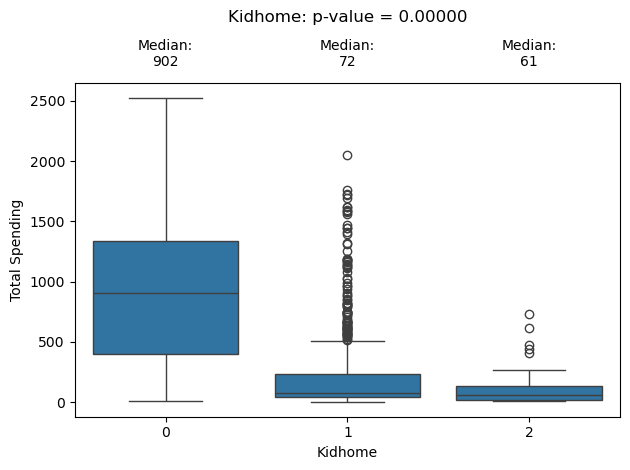

Teenhome: p-value = 0.02029


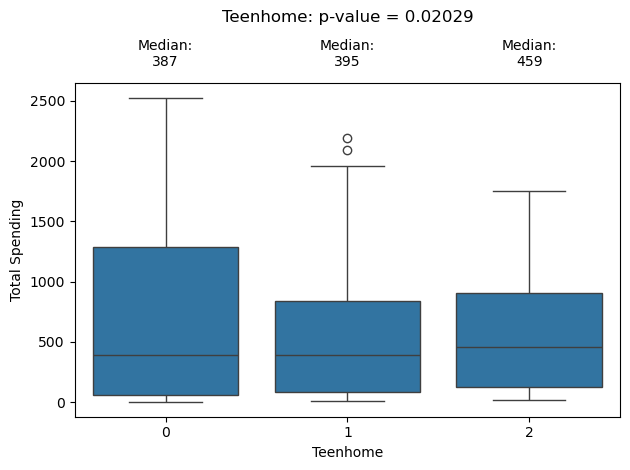

In [26]:
many_population_cols = [col for col in df_numeric.columns if df_numeric[col].nunique() == 3]

for col in list(df_object.columns) + many_population_cols:
    groups = [df[df[col] == x]['TotalSpending'] for x in df[col].unique()]
    stat, p = kruskal(*groups)
    print(f'{col}: p-value = {p:.5f}')

    if p < 0.05:
        category_order = sorted(df[col].unique()) 

        ax = sns.boxplot(x=col, y='TotalSpending', data=df, order=category_order)
        plt.title(f"{col}: p-value = {p:.5f}\n\n\n")

        medians = df.groupby(col)['TotalSpending'].median().reindex(category_order)
        labels = [f"Median:\n{int(m)}" for m in medians]

        for i, label in enumerate(labels):
            ax.annotate(label, xy=(i, 1.05), xycoords=('data', 'axes fraction'), ha='center')

        plt.ylabel("Total Spending")
        plt.tight_layout()
        plt.show()

- Hanya kategori dengan p-value < 0.05 yang ditampilkan boxplot-nya.
- Dari uji Kruskall Wallis hanya kategori Education, Teenhome, dan Kidhome yang memiliki perbedaan total spending yang signifikan pada salah satu kategori.

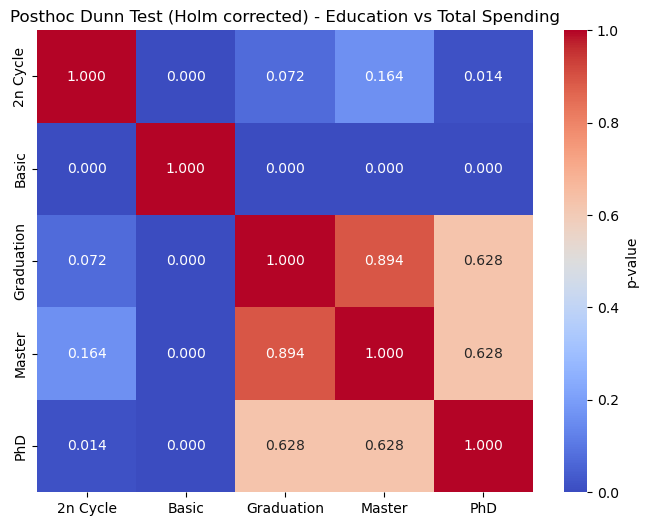

In [27]:
p_values = sp.posthoc_dunn(df, val_col='TotalSpending', group_col='Education', p_adjust='holm')

plt.figure(figsize=(8, 6))
sns.heatmap(p_values, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Posthoc Dunn Test (Holm corrected) - Education vs Total Spending')
plt.show()

- Pendidikan kategori Master, Graduation, dan PhD memiliki total spending yang tidak berbeda signifikan.
- Basic total spendingnya berbeda signifikan perbedannya apabila dibandingkan dengan lainnya.
- 2n Cycle berbeda signifikan dengan Basic dan PhD.
- Jika melihat boxplot Master, Graduation, dan PhD lebih tinggi nilai median total spending dibanding dengan Basic dan 2n Cycle.
- Master, Graduation, dan PhD dapat disatukan untuk dijadikan salah satu segmen pelanggan utama.

In [28]:
edu_map = {
    'Graduation': 'Higher Education',
    'Master': 'Higher Education',
    'PhD': 'Higher Education',
    '2n Cycle': 'Intermediate',
    'Basic': 'Basic'
}

df['Education_Grouped'] = df['Education'].map(edu_map)

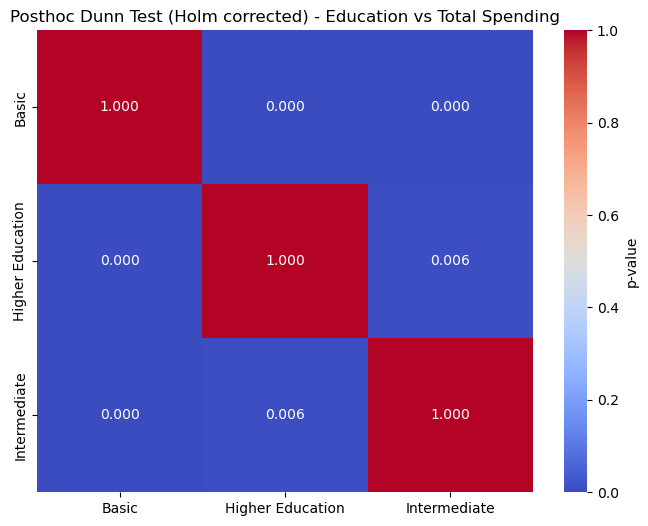

In [29]:
p_values = sp.posthoc_dunn(df, val_col='TotalSpending', group_col='Education_Grouped', p_adjust='holm')

plt.figure(figsize=(8, 6))
sns.heatmap(p_values, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Posthoc Dunn Test (Holm corrected) - Education vs Total Spending')
plt.show()

- Setelah Master, Graduation, dan PhD disatukan terlihat perbedaan total spending dari setiap kategori signifikan.

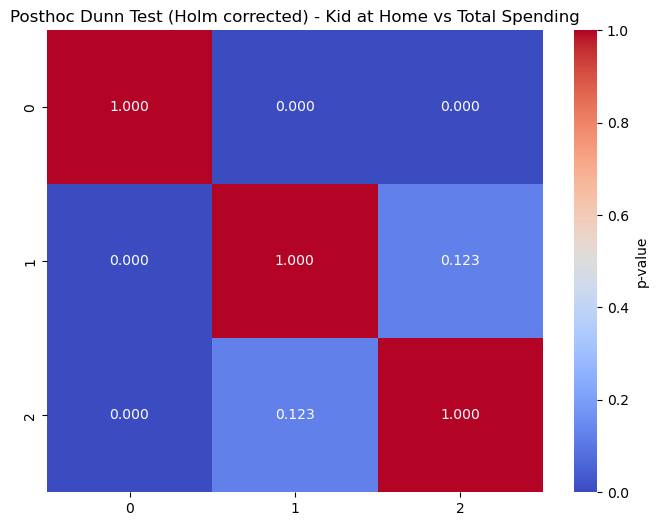

In [30]:
p_values = sp.posthoc_dunn(df, val_col='TotalSpending', group_col='Kidhome', p_adjust='holm')

plt.figure(figsize=(8, 6))
sns.heatmap(p_values, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Posthoc Dunn Test (Holm corrected) - Kid at Home vs Total Spending')
plt.show()

- Jumlah anak kecil 1 di rumah tidak signifikan perbedaan total spending-nya dibandingkan jumlah anak kecil 2.
- Meski begitu keduanya berbeda signifikan total spending-nya apabila dibandingkan dengan pelanggan tanpa anak kecil di rumah.
- Distribusi total spending dari pelanggan tanpa anak kecil dapat dilihat pada boxplot cenderung lebih tinggi dibandingkan dengan yang memiliki anak kecil.

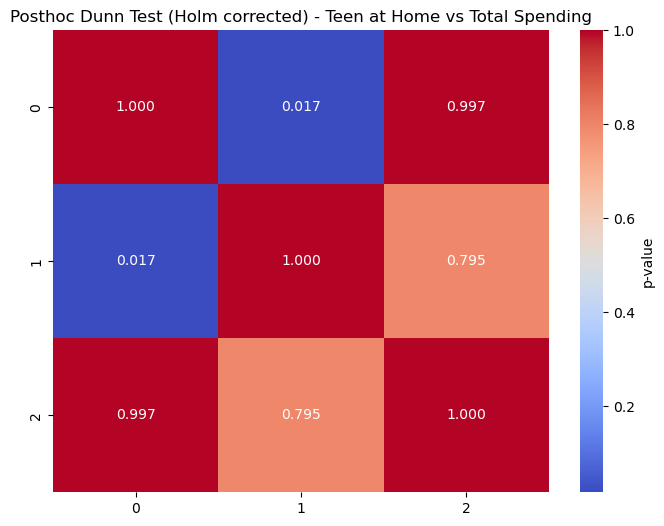

In [31]:
p_values = sp.posthoc_dunn(df, val_col='TotalSpending', group_col='Teenhome', p_adjust='holm')

plt.figure(figsize=(8, 6))
sns.heatmap(p_values, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Posthoc Dunn Test (Holm corrected) - Teen at Home vs Total Spending')
plt.show()

- Perbedaan signifikan hanya terdapat di pelanggan dengan jumlah remaja 1 di rumah dan pelanggan dengan tanpa remaja.
- Dari boxplot dapat dilihat median pelanggan dengan jumlah remaja 1 memiliki total spending lebih tinggi dibanding yang tanpa remaja.
- Meski begitu, dikarenakan jumlah pelanggan 2 tidak berbeda signifikan dengan kategori lainnya maka tidak ada bukti bahwa memiliki lebih banyak remaja akan berkorelasi kuat dengan uang yang dihabiskan pelanggan.
- Oleh karena itu, kolom Teenhome tidak dipakai dalam analisis lebih lanjut.

### Konfirmasi Demografi dengan Income
- Kolom Education_Grouped dan Kidhome dapat digunakan untuk menentukan pelanggan utama.
- Meski begitu perlu dilakukan konfirmasi dari tiap kolom menggunakan income untuk mengetahui apakah kategori tertentu memiliki income yang tinggi.
- Income dijadikan konfirmasi karena memiliki korelasi kuat dan positif dengan total spending pelanggan.

#### Konfirmasi Kolom Education_Grouped

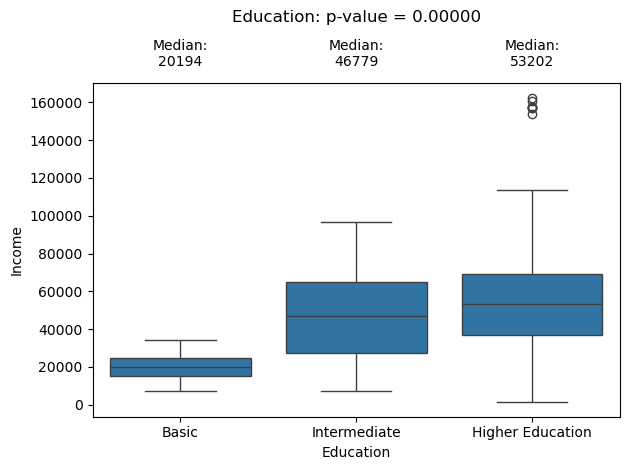

In [32]:
groups = [df[df['Education_Grouped'] == x]['Income'] for x in df['Education_Grouped'].unique()]
stat, p = kruskal(*groups)

medians = df.groupby('Education_Grouped')['Income'].median().sort_values()
category_order =  medians.index.tolist() 

ax = sns.boxplot(x='Education_Grouped', y='Income', data=df, order=category_order)
plt.title(f"Education: p-value = {p:.5f}\n\n\n")

labels = [f"Median:\n{int(m)}" for m in medians]

for i, label in enumerate(labels):
    ax.annotate(label, xy=(i, 1.05), xycoords=('data', 'axes fraction'), ha='center')

plt.xlabel("Education")
plt.ylabel("Income")
plt.tight_layout()
plt.show()

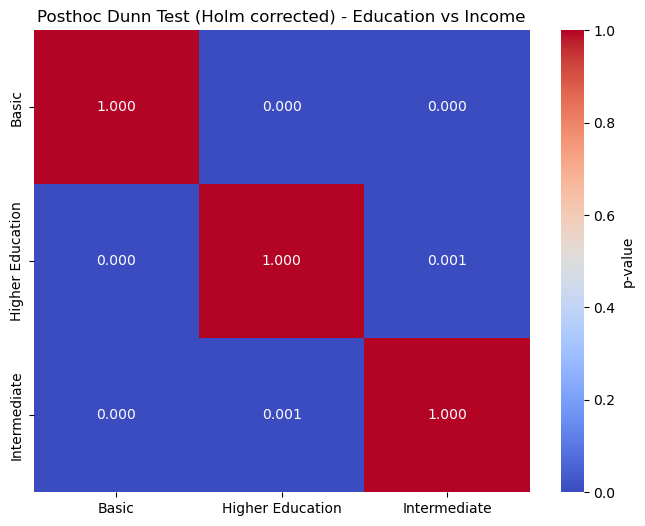

In [33]:
p_values = sp.posthoc_dunn(df, val_col='Income', group_col='Education_Grouped', p_adjust='holm')

plt.figure(figsize=(8, 6))
sns.heatmap(p_values, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Posthoc Dunn Test (Holm corrected) - Education vs Income')
plt.show()

- Dari uji Kruskal Wallis dan uji Posthoc Dunn didapati bahwa semakin tinggi tingkat pendidikan maka semakin tinggi incomenya.
- Dari boxplot juga dapat dilihat median income semakin tinggi seiring dengan tingkat pendidikan.
- Hal ini juga sesuai dengan hubungan income dan total spending.

#### Konfirmasi Kolom Kidhome

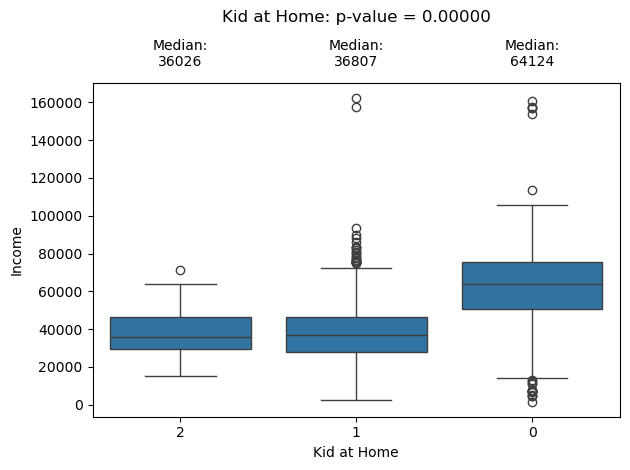

In [34]:
groups = [df[df['Kidhome'] == x]['Income'] for x in df['Kidhome'].unique()]
stat, p = kruskal(*groups)

medians = df.groupby('Kidhome')['Income'].median().sort_values()
category_order =  medians.index.tolist() 

ax = sns.boxplot(x='Kidhome', y='Income', data=df, order=category_order)
plt.title(f"Kid at Home: p-value = {p:.5f}\n\n\n")

labels = [f"Median:\n{int(m)}" for m in medians]

for i, label in enumerate(labels):
    ax.annotate(label, xy=(i, 1.05), xycoords=('data', 'axes fraction'), ha='center')

plt.xlabel("Kid at Home")
plt.ylabel("Income")
plt.tight_layout()
plt.show()

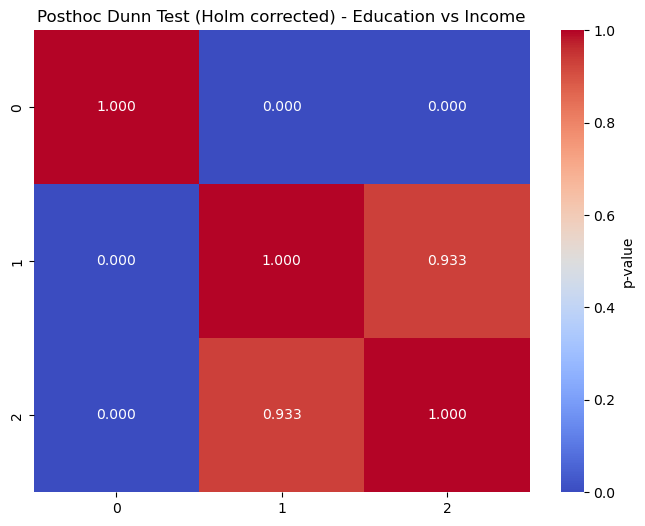

In [35]:
p_values = sp.posthoc_dunn(df, val_col='Income', group_col='Kidhome', p_adjust='holm')

plt.figure(figsize=(8, 6))
sns.heatmap(p_values, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Posthoc Dunn Test (Holm corrected) - Education vs Income')
plt.show()

- Dari uji Kruskal Wallis dan uji Posthoc Dunn didapati bahwa pelanggan yang tidak memiliki anak kecil di rumah cenderung memiliki income yang lebih tinggi.
- Dari boxplot juga dapat dilihat median income lebih tinggi untuk pelanggan yang tidak memiliki anak kecil.
- Hal ini juga sesuai dengan hubungan income dan total spending.

### Penentuan Pelanggan Utama Berdasarkan Demografi dan Total Pengeluaran
Berdasarkan hasil analisis, karakteristik demografi yang paling menonjol dalam membedakan pelanggan dengan total pengeluaran belanja yang lebih tinggi adalah tingkat pendidikan dan jumlah anak kecil di rumah (Kidhome). Pelanggan dengan latar belakang pendidikan lebih tinggi (Graduation, Master, dan PhD) serta tidak memiliki anak kecil (Kidhome = 0) secara konsisten menunjukkan nilai belanja yang lebih besar. Hal ini menjadikan kedua variabel tersebut sebagai indikator kuat dalam mengidentifikasi pelanggan utama supermarket.

#### Pelanggan Utama Berdasarkan Pendidikan

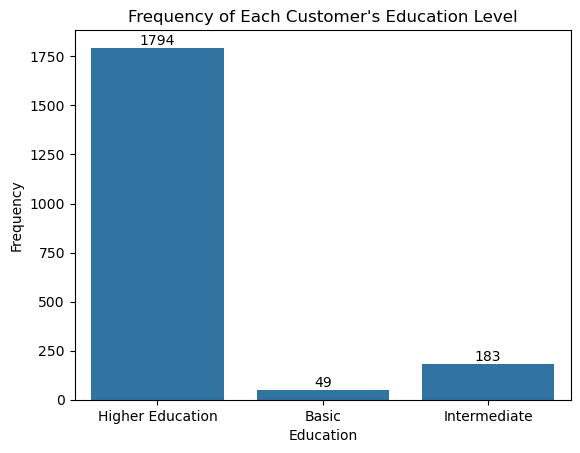

In [36]:
ax = sns.countplot(data=df, x=df['Education_Grouped'])

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.title("Frequency of Each Customer's Education Level")
plt.xlabel("Education")
plt.ylabel('Frequency')
plt.show()

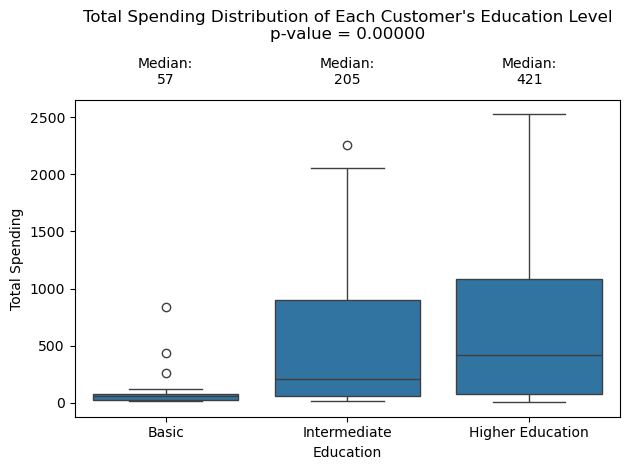

In [37]:
groups = [df[df['Education_Grouped'] == x]['TotalSpending'] for x in df['Education_Grouped'].unique()]
stat, p = kruskal(*groups)

medians = df.groupby('Education_Grouped')['TotalSpending'].median().sort_values()
category_order =  medians.index.tolist() 

ax = sns.boxplot(x='Education_Grouped', y='TotalSpending', data=df, order=category_order)
plt.title(f"Total Spending Distribution of Each Customer's Education Level\np-value = {p:.5f}\n\n\n")

labels = [f"Median:\n{int(m)}" for m in medians]

for i, label in enumerate(labels):
    ax.annotate(label, xy=(i, 1.05), xycoords=('data', 'axes fraction'), ha='center')

plt.xlabel("Education")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

- Pelanggan higher education memiliki populasi yang besar jadi cocok dijadikan pelanggan utama.
- Selain itu, higher education memiliki total pengeluaran yang lebih tinggi dibandingkan dengan lainnya.

#### Pelanggan Utama Berdasarkan Jumlah Anak di Rumah

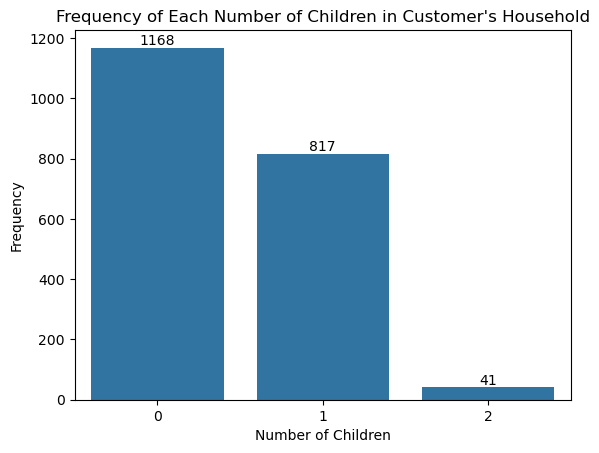

In [38]:
ax = sns.countplot(data=df, x=df['Kidhome'])

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.title("Frequency of Each Number of Children in Customer's Household")
plt.xlabel("Number of Children")
plt.ylabel('Frequency')
plt.show()

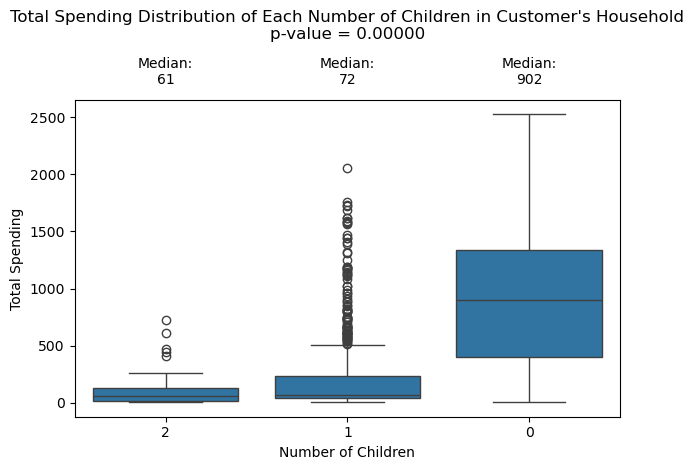

In [39]:
groups = [df[df['Kidhome'] == x]['TotalSpending'] for x in df['Kidhome'].unique()]
stat, p = kruskal(*groups)

medians = df.groupby('Kidhome')['TotalSpending'].median().sort_values()
category_order =  medians.index.tolist() 

ax = sns.boxplot(x='Kidhome', y='TotalSpending', data=df, order=category_order)
plt.title(f"Total Spending Distribution of Each Number of Children in Customer's Household\np-value = {p:.5f}\n\n\n")

labels = [f"Median:\n{int(m)}" for m in medians]

for i, label in enumerate(labels):
    ax.annotate(label, xy=(i, 1.05), xycoords=('data', 'axes fraction'), ha='center')

plt.xlabel("Number of Children")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

- Pelanggan yang tidak memiliki anak kecil di rumah memiliki populasi yang besar jadi cocok dijadikan pelanggan utama.
- Selain itu, pelanggan tersebut memiliki total pengeluaran yang lebih tinggi dibandingkan dengan lainnya.

### Kebiasaan Belanja dari Pelanggan Utama

#### Produk yang Sering Dibeli

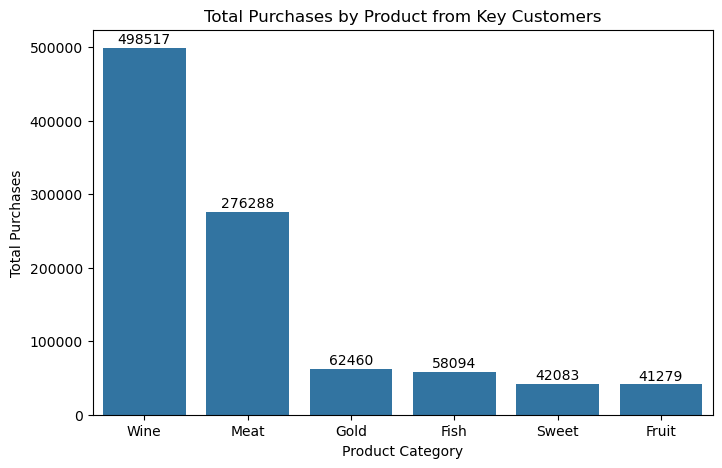

In [40]:
pelanggan_utama = df[(df['Education_Grouped'] == 'Higher Education') & (df['Kidhome'] == 0)]
produk_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

produk_dibeli = pelanggan_utama[produk_cols].sum()
produk_dibeli.index = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']
produk_dibeli = produk_dibeli.sort_values(ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=produk_dibeli.index, y=produk_dibeli.values)
for container in ax.containers:
    ax.bar_label(container, padding=1)
plt.title('Total Purchases by Product from Key Customers')
plt.ylabel('Total Purchases')
plt.xlabel('Product Category')
plt.show()

- Wine merupakan produk dengan pengeluaran tertinggi dari pelanggan utama.
- Meat mengikuti di urutan kedua dan pengeluaran produk lainnya jauh lebih rendah.

#### Saluran Belanja yang Digunakan Terbanyak

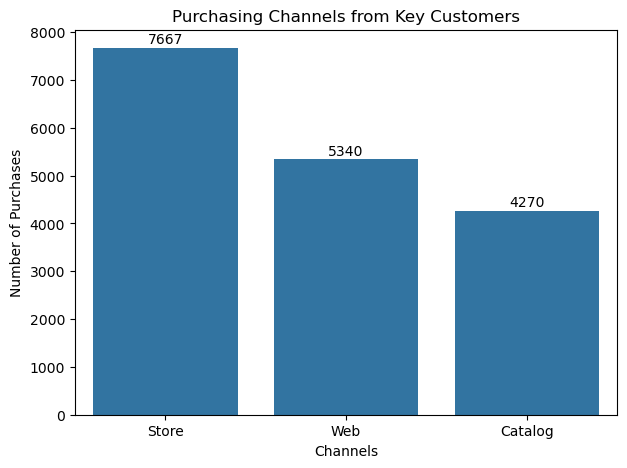

In [41]:
channel_pembelian = {
    'Store': pelanggan_utama['NumStorePurchases'].sum(),
    'Web': pelanggan_utama['NumWebPurchases'].sum(),
    'Catalog': pelanggan_utama['NumCatalogPurchases'].sum()
}

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=list(channel_pembelian.keys()), y=list(channel_pembelian.values()))
for container in ax.containers:
    ax.bar_label(container, padding=1)
plt.title('Purchasing Channels from Key Customers')
plt.xlabel('Channels')
plt.ylabel('Number of Purchases')
plt.show()

- Pelanggan utama lebih memilih belanja langsung ke toko dibandingkan melalui katalog atau web.

#### Kecenderungan terhadap Diskon

In [42]:
top_visits = pelanggan_utama['NumDealsPurchases']
all_visits = df['NumDealsPurchases']

stat, p = mannwhitneyu(top_visits, all_visits, alternative='two-sided')

print(f"Mann-Whitney U Test:\nU-statistic = {stat:.2f}, p-value = {p:.4f}")

Mann-Whitney U Test:
U-statistic = 942667.50, p-value = 0.0000


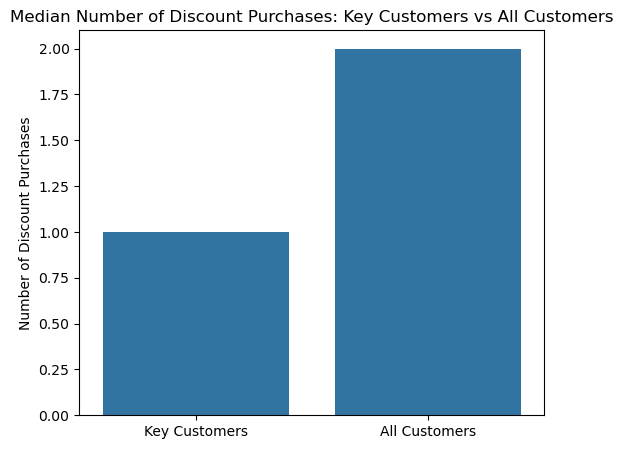

In [43]:
median_utama = pelanggan_utama['NumDealsPurchases'].median()
median_all = df['NumDealsPurchases'].median()

median_df = pd.DataFrame({
    'Grup': ['Key Customers', 'All Customers'],
    'Median_NumDealsPurchases': [median_utama, median_all]
})

plt.figure(figsize=(6,5))
sns.barplot(data=median_df, x='Grup', y='Median_NumDealsPurchases')
plt.title('Median Number of Discount Purchases: Key Customers vs All Customers')
plt.ylabel('Number of Discount Purchases')
plt.xlabel('')
plt.show()

- Hasil uji Mann Whitney nilai p<0.05 sehingga perbedaan jumlah pembelian dengan diskon dari pelanggan utama dan keseluruhan pelanggan signifikan.
- Pelanggan utama cenderung jarang membeli saat diskon dibanding dengan pelanggan lainnya.
- Hal ini terlihat dari median pembelian diskon mereka yang lebih rendah dibanding seluruh pelanggan.

#### Respon Terhadap Kampanye

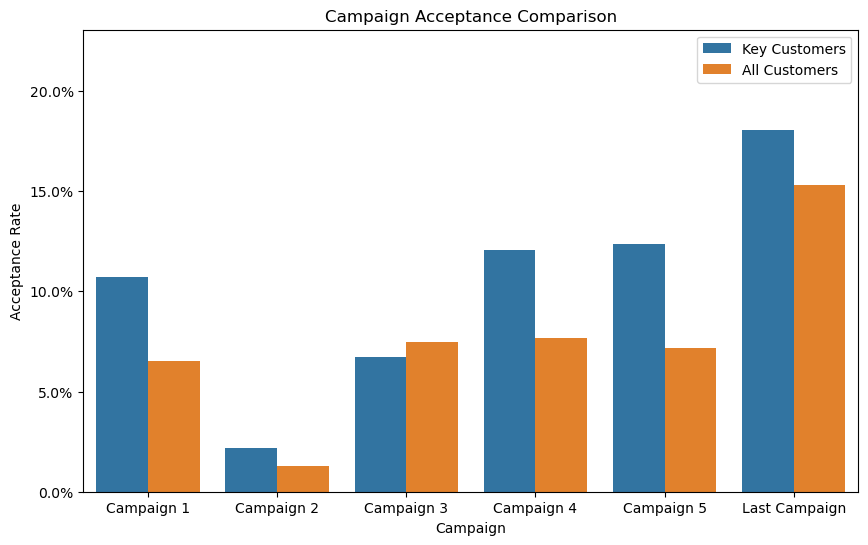

In [44]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_labels = {
    'AcceptedCmp1': 'Campaign 1',
    'AcceptedCmp2': 'Campaign 2',
    'AcceptedCmp3': 'Campaign 3',
    'AcceptedCmp4': 'Campaign 4',
    'AcceptedCmp5': 'Campaign 5',
    'Response': 'Last Campaign'
}

data = {
    'Campaign': [],
    'Group': [],
    'Acceptance Rate': []
}

for col in campaigns:
    rate_all = df[col].mean()
    rate_top = pelanggan_utama[col].mean()

    label = campaign_labels[col]

    data['Campaign'].append(label)
    data['Group'].append('Key Customers')
    data['Acceptance Rate'].append(rate_top)

    data['Campaign'].append(label)
    data['Group'].append('All Customers')
    data['Acceptance Rate'].append(rate_all)

campaign_df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_df, x='Campaign', y='Acceptance Rate', hue='Group')
plt.title('Campaign Acceptance Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Campaign')
plt.ylim(0, campaign_df['Acceptance Rate'].max() + 0.05)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1.0))
plt.legend(title='')
plt.show()

- Pelanggan utama (berpendidikan tinggi dan tanpa anak kecil di rumah) menunjukkan tingkat penerimaan kampanye yang lebih tinggi dibanding keseluruhan pelanggan untuk hampir semua kampanye kecuali kampanye ke-3.
- Hal ini menunjukkan efektivitas kampanye 3 kemungkinan kurang sesuai dengan segmen tersebut.
- Secara keseluruhan tingkat penerimaan tetap rendah, yaitu di bawah 20% untuk semua kampanye.

#### Kunjungan ke Website

In [45]:
top_visits = pelanggan_utama['NumWebVisitsMonth']
all_visits = df['NumWebVisitsMonth']

stat, p = mannwhitneyu(top_visits, all_visits, alternative='two-sided')

print(f"Mann-Whitney U Test:\nU-statistic = {stat:.2f}, p-value = {p:.4f}")

Mann-Whitney U Test:
U-statistic = 795015.50, p-value = 0.0000


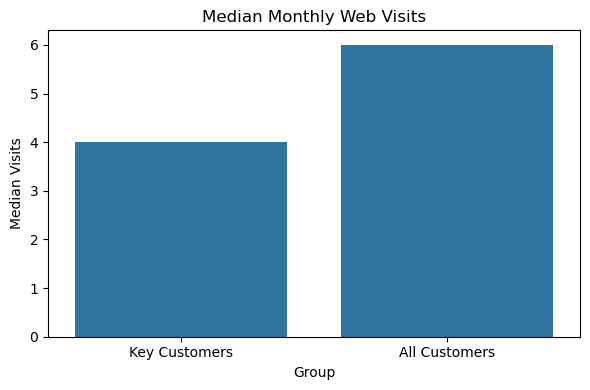

In [46]:
median_top = pelanggan_utama['NumWebVisitsMonth'].median()
median_all = df['NumWebVisitsMonth'].median()

visit_data = pd.DataFrame({
    'Group': ['Key Customers', 'All Customers'],
    'Median Visits': [median_top, median_all]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=visit_data, x='Group', y='Median Visits')
plt.title('Median Monthly Web Visits')
plt.tight_layout()
plt.show()

- Hasil uji Mann Whitney nilai p<0.05 sehingga perbedaan kunjungan website dari pelanggan utama dan keseluruhan pelanggan signifikan.
- Pelanggan utama cenderung jarang mengunjungi situs web supermarket di bulan terakhir dibandingkan keseluruhan pelanggan.

## Kesimpulan dan Rekomendasi
Berikut kesimpulan yang didapat dari analisis yang telah dilakukan:
- Pelanggan utama supermarket adalah kelompok tanpa anak kecil di rumah dan berpendidikan tinggi, karena keduanya menunjukkan jumlah pengeluaran yang lebih tinggi secara konsisten, signifikan secara statistik, dan memiliki jumlah yang besar secara populasi.
- Kebiasaan belanja dari pelanggan utama:
  1. Wine merupakan produk dengan pengeluaran tertinggi. Daging mengikuti di urutan kedua dan pengeluaran untuk produk lainnya jauh lebih rendah.
  2. Lebih memilih belanja langsung ke toko dibandingkan melalui katalog atau web.
  3. Cenderung jarang membeli saat diskon dibanding dengan pelanggan lainnya.
  4. Tingkat penerimaan kampanye yang lebih tinggi dibanding keseluruhan pelanggan untuk hampir semua kampanye kecuali kampanye ke-3 meski begitu secara keseluruhan tingkat penerimaan tetap rendah.
  5. Cenderung jarang mengunjungi situs web supermarket di bulan terakhir dibandingkan rata-rata pelanggan lainnya.
#### Rekomendasi
1. Fokuskan pemasaran pada segmen tanpa anak dan berpendidikan tinggi.
2. Optimalkan penjualan produk unggulan (Wine & Daging).
   * Buat promosi khusus atau bundling untuk produk wine dan daging.
   * Tawarkan program loyalitas berbasis volume pembelian untuk kategori ini.
4. Perkuat pengalaman belanja di toko (offline) dengan meningkatkan kenyamanan, pelayanan, dan eksklusivitas di toko seperti priority lane, personal shopper, atau area wine khusus.
5. Strategi diskon sebaiknya tidak menjadi fokus utama saat menargetkan pelanggan utama dan fokus pada value-driven offers seperti produk edisi terbatas, bundling produk premium, dan reward eksklusif untuk loyalitas atau pembelian besar.
6. Kembangkan kampanye promosi yang disesuaikan dengan karakteristik belanja pelanggan utama. Fokuskan kampanye pada produk dengan seperti wine dan daging, distribusikan melalui saluran toko fisik, dan personalisasi isi kampanye untuk meningkatkan efektivitas.
7. Tingkatkan engagement digital secara selektif artinya kanal digital hanya untuk memperkuat kenyamanan dan pengalaman belanja pelanggan utama  (misalnya reminder personal, katalog eksklusif), tanpa mengubah kebiasaan mereka secara drastis.

## Simpan Data untuk Visualisasi Tableau

In [47]:
df.to_csv('Supermarket Customers (cleaned).csv', index=True)